# Лабораторная работа № 1. Методы одномерной оптимизации

**ЗАДАЧА:** Найти приближенное решение задачи минимизации $f(x)$ на интервале $[a,b]$, отличающееся от точного решения $x^*$ не более чем на $\varepsilon$ :

$$|x-x^*|\leq\varepsilon$$

In [45]:
f = lambda x: x**2 + 2*x - 4
a = -2
b = 1
eps = 0.01

## Метод Дихотомии

**Сущность:** Интервал разбивается на две равные части, затем выбирается половина, в которой находится искомая точка, и процесс повторяется, пока не будет достигнута необходимая точность.

**Сложность:** О(log n), где n - число итераций.

In [49]:
import pandas as pd
from typing import Callable


def dihotomia(
    f: Callable[[float], float],
    interval: tuple[float,float],
    eps: float   
) -> float:
    table = pd.DataFrame(columns=['a','b','len','x1','x2','f_x1','f_x2'])
    a, b = interval

    while b - a > 2 * eps:
        # расчет середины отрезка [a,b]
        x = (a + b)/2
        # расчет значения точек x1, x2 эпсилон окрестности точки х
        x1, x2 = x - eps/2, x + eps/2
        # заполнение таблицы
        table.loc[len(table)] = [a, b, b-a, x1, x2, f(x1), f(x2)]
        # пересчет концов отрезка
        a, b = (x1, b) if f(x1) > f(x2) else (a, x2)

    table.loc[len(table)] = [a, b, b-a] + [None]*4
    
    return table, (a + b) / 2


table, answer_dih = dihotomia(f, (a, b), eps)

print(table)
print(answer_dih)
print(f'\nМинимум функции f на интервале [a,b]: ({answer_dih:.3f}, {f(answer_dih):.2f})')

          a         b       len        x1        x2      f_x1      f_x2
0 -2.000000  1.000000  3.000000 -0.505000 -0.495000 -4.754975 -4.744975
1 -2.000000 -0.495000  1.505000 -1.252500 -1.242500 -4.936244 -4.941194
2 -1.252500 -0.495000  0.757500 -0.878750 -0.868750 -4.985298 -4.982773
3 -1.252500 -0.868750  0.383750 -1.065625 -1.055625 -4.995693 -4.996906
4 -1.065625 -0.868750  0.196875 -0.972187 -0.962187 -4.999226 -4.998570
5 -1.065625 -0.962187  0.103437 -1.018906 -1.008906 -4.999643 -4.999921
6 -1.018906 -0.962187  0.056719 -0.995547 -0.985547 -4.999980 -4.999791
7 -1.018906 -0.985547  0.033359 -1.007227 -0.997227 -4.999948 -4.999992
8 -1.007227 -0.985547  0.021680 -1.001387 -0.991387 -4.999998 -4.999926
9 -1.007227 -0.991387  0.015840       NaN       NaN       NaN       NaN
-0.9993066406249997

Минимум функции f на интервале [a,b]: (-0.999, -5.00)


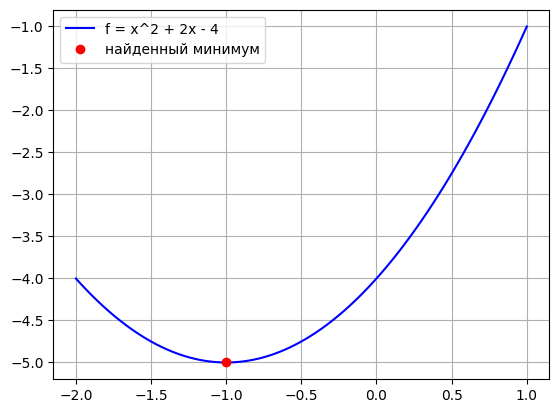

In [50]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(a, b, 100)

plt.plot(x, f(x), 'blue', answer_dih, f(answer_dih), 'ro')

plt.legend(['f = x^2 + 2x - 4', 'найденный минимум'])
plt.grid(True)
plt.show()

## Метод Фибоначчи

**Сущность:** В этом методе интервал разбивается с использованием последовательности чисел Фибоначчи, а затем выбирается новый интервал для следующей итерации.

**Сложность:** O(log n), где n - число итераций. Метод Фибоначчи может требовать меньше итераций, чем дихотомическое деление.

In [51]:
def fibonacci(
    f: Callable[[float], float],
    interval: tuple[float, float],
    eps: float
) -> float:
    table = pd.DataFrame(columns=['a','b','l','x1','x2','f_x1','f_x2'])
    a, b = interval

    # формирование последовательности Фибоначчи
    F = [1, 1]
    while F[-1] < (b - a) / eps:
        F.append(F[-1] + F[-2])
    
    delta = (b - a) / F[-1]
    
    N = len(F) - 1
    
    # начальные вычисления внутренних точек x1, x2
    x1 = a + F[N - 2] * delta
    x2 = b - F[N - 2] * delta
    # два вычисления функции на первой итерации, далее только по одному
    f_x1, f_x2 = f(x1), f(x2)

    for k in range(1, N - 1):
        table.loc[len(table)] = [a, b, b-a, x1, x2, f_x1, f_x2]
        if f_x1 < f_x2:
            # x1 - внутренняя точка интервала [a, x2]
            b = x2
            x2, f_x2 = x1, f_x1
            x1 = a + F[N - k - 2] * delta
            f_x1 = f(x1)
        else:
            # x2 - внутренняя точка интервала [x1, b]
            a = x1
            x1, f_x1 = x2, f_x2
            x2 = b - F[N - k - 2] * delta
            f_x2 = f(x2)
    
    table.loc[len(table)] = [a, b, b-a] + [None]*4

    return table, (a + b) / 2

table, answer_fib = fibonacci(f, (a, b), eps)

print(table)
print(answer_fib)
print(f'\nМинимум функции f на интервале [a,b]: ({answer_fib:.3f}, {f(answer_fib):.2f})')

           a         b         l        x1        x2      f_x1      f_x2
0  -2.000000  1.000000  3.000000 -0.854111 -0.145889 -4.978717 -4.270494
1  -2.000000 -0.145889  1.854111 -1.291777 -0.854111 -4.914866 -4.978717
2  -1.291777 -0.145889  1.145889 -0.854111 -0.583554 -4.978717 -4.826573
3  -1.291777 -0.583554  0.708223 -1.021220 -0.854111 -4.999550 -4.978717
4  -1.291777 -0.854111  0.437666 -1.124668 -1.021220 -4.984458 -4.999550
5  -1.124668 -0.854111  0.270557 -1.021220 -0.957560 -4.999550 -4.998199
6  -1.124668 -0.957560  0.167109 -1.061008 -1.021220 -4.996278 -4.999550
7  -1.061008 -0.957560  0.103448 -1.021220 -0.997347 -4.999550 -4.999993
8  -1.021220 -0.957560  0.063660 -0.997347 -0.981432 -4.999993 -4.999655
9  -1.021220 -0.981432  0.039788 -1.005305 -0.997347 -4.999972 -4.999993
10 -1.005305 -0.981432  0.023873 -0.997347 -0.989390 -4.999993 -4.999887
11 -1.005305 -0.989390  0.015915       NaN       NaN       NaN       NaN
-0.9973474801061006

Минимум функции f на интервале

In [52]:
fff = lambda x: 1/4*x**4 - 2/3*x**3 + 1/2*x**2 - 2*x + 6
aaa = 1.5
bbb = 4
eeepppsss = 0.1

## Метод золотого сечения

**Сущность:** Этот метод также используется для поиска оптимального значения функции на отрезке. Особенностью метода является выбор точек разбиения на основе "золотого сечения" интервала.

**Сложность:** O(log n), где n - число итераций. Метод "золотого сечения" обычно требует меньшее количество итераций по сравнению с дихотомическим делением.

In [68]:
from math import sqrt

def golden_ratio(
    f: Callable[[float], float],
    interval: tuple[float, float],
    eps: float
) -> float:
    table = pd.DataFrame(columns=['a','b','l','x1','x2','f_x1','f_x2'])
    
    a, b = interval
    
    alpha = 2/(1 + sqrt(5)) # (золотое сечение)^-1

    x1 = a + alpha * (b - a)
    x2 = b - alpha * (b - a)

    f_x1, f_x2 = f(x1), f(x2)

    while b - a > 2*eps:
        table.loc[len(table)] = [a, b, b-a, x1, x2, f_x1, f_x2] 
        
        if f_x1 > f_x2:
            b = x1
            x1, f_x1 = x2, f_x2
            x2 = b - alpha * (b - a)
            f_x2 = f(x2)
        else:
            a = x2
            x2, f_x2 = x1, f_x1
            x1 = a + alpha * (b - a)
            f_x1 = f(x1)
    
    table.loc[len(table)] = [a, b, b-a] + [None]*4

    return table, (a + b)/2

table, answer_gol = golden_ratio(f, (a, b), eps)

print(table)
print(answer_gol)
print(f'\nМинимум функции f на интервале [a,b]: ({answer_gol:.3f}, {f(answer_gol):.2f})')

           a         b         l        x1        x2      f_x1      f_x2
0  -2.000000  1.000000  3.000000 -0.145898 -0.854102 -4.270510 -4.978714
1  -2.000000 -0.145898  1.854102 -0.854102 -1.291796 -4.978714 -4.914855
2  -1.291796 -0.145898  1.145898 -0.583592 -0.854102 -4.826604 -4.978714
3  -1.291796 -0.583592  0.708204 -0.854102 -1.021286 -4.978714 -4.999547
4  -1.291796 -0.854102  0.437694 -1.021286 -1.124612 -4.999547 -4.984472
5  -1.124612 -0.854102  0.270510 -0.957428 -1.021286 -4.998188 -4.999547
6  -1.124612 -0.957428  0.167184 -1.021286 -1.060753 -4.999547 -4.996309
7  -1.060753 -0.957428  0.103326 -0.996894 -1.021286 -4.999990 -4.999547
8  -1.021286 -0.957428  0.063859 -0.981819 -0.996894 -4.999669 -4.999990
9  -1.021286 -0.981819  0.039467 -0.996894 -1.006211 -4.999990 -4.999961
10 -1.006211 -0.981819  0.024392 -0.991136 -0.996894 -4.999921 -4.999990
11 -1.006211 -0.991136  0.015075       NaN       NaN       NaN       NaN
-0.9986737419193213

Минимум функции f на интервале

## ИТОГИ

In [78]:
from scipy.optimize import fmin

real = fmin(f, 0)

Optimization terminated successfully.
         Current function value: -5.000000
         Iterations: 25
         Function evaluations: 50


In [82]:
results = pd.DataFrame({'x': [answer_dih, answer_fib, answer_gol, real[0]]},
                       index=['Метод Дихотомии', 'Метод Фибоначчи', 'Метод золотого сечения', 'Реальное значение'])
results

,x
Метод Дихотомии,-0.999307
Метод Фибоначчи,-0.997347
Метод золотого сечения,-0.998674
Реальное значение,-1.000000


**Сравнительные характеристики:**

- Все три метода используются для поиска оптимального значения функции на заданном интервале.
- Метод Фибоначчи и метод "золотого сечения" могут потребовать меньшее количество итераций по сравнению с дихотомическим делением.
- Сложность всех трех методов составляет O(log n), где n - число итераций.
- Выбор конкретного метода зависит от конкретной задачи, особенностей функции и необходимой точности результата.